# Analysis of the Experimental Results
Apply multivariate analysis of the experimental results

## Questions to investigate
For each of the clustering methods which one provides the best clustering of stations for the variants of epsilon nad maxPts. Best clustering can be defined as:
1. Most number of clusters with most number of stations (i.e. least noise)
1. Maximum quality measure with the silhouette coefficient, calinzki-harabaz score, davis-bouldin score, and dunn index

## Cloud-Clustering

In [365]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

cloud_clust_df=pd.read_csv("./Experiment_Data_Cloud_Cluster.csv")
#cloud_clust_df.head()
lst_drop_cols = ['Trial', 'Name_Code', 'Station Type', 'Station Quantity', 'Algorithm', 
               'Epsilon', 'Method_Code', 'Metric', 'Fit_Predict']
cloud_clust_df = cloud_clust_df.drop(lst_drop_cols,axis=1)
cloud_clust_df = cloud_clust_df[~cloud_clust_df["Silhouette Coefficient"].isin(['None'])]
cloud_clust_df = cloud_clust_df[~cloud_clust_df["Calinski Harabaz score"].isin(['None'])]
cloud_clust_df = cloud_clust_df[~cloud_clust_df["Davies Bouldin score"].isin(['None'])]
cloud_clust_df = cloud_clust_df[~cloud_clust_df["Dunn Index"].isin(['None'])]

''' append cluster name to method '''
cloud_clust_df['Method'] = cloud_clust_df['Name']+'-'+cloud_clust_df['Method']
cloud_clust_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 0 to 79
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Name                     75 non-null     object
 1   Distance                 75 non-null     int64 
 2   Minimum Points           75 non-null     int64 
 3   Method                   75 non-null     object
 4   Cluster Count            75 non-null     int64 
 5   Clustered Station Count  75 non-null     int64 
 6   Unclustered Noise Count  75 non-null     int64 
 7   Silhouette Coefficient   75 non-null     object
 8   Calinski Harabaz score   75 non-null     object
 9   Davies Bouldin score     75 non-null     object
 10  Dunn Index               75 non-null     object
dtypes: int64(5), object(6)
memory usage: 7.0+ KB


### Normalize quality measures

In [366]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#scaler = StandardScaler()
scaler = MinMaxScaler()

norm_df = cloud_clust_df.copy()
lst_norm_cols = list(['Silhouette Coefficient',
                      'Calinski Harabaz score',
                      'Davies Bouldin score',
                      'Dunn Index'])
for col in lst_norm_cols:
    scaled = scaler.fit_transform(np.array(cloud_clust_df[col]).reshape(-1,1))
    norm_df[col] = pd.DataFrame(scaled)
norm_df = norm_df.dropna()
print('Normalization complete!')

Normalization complete!


### Correlation matrix
We [plot the correlation matrix](https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e) to determine if there is a single cluster quality measure we could use to analyze the clusters for each combination of clustering method, epsilon, and minPts.
* Calinski Habaz score is positively correlated with Silhouette coefficient and the Dunn Index but negatively correlated with Davies Bouldin score; therefore, we can eliminate the Calinski Habaz score
* However, the Silhouette coefficient, Davies Bouldin score and the Dunn Index are negatively correlated with each other
* The Silhouette coefficient and the Davies Bouldin score are closer to 0 implying we may select on of them as the quality measure.
* The **Davies Bouldin score** is furthest away from the Dunn Index and the Calinski Habaz score, which implies it would it be the preffered choice to select as the single cluster qulity indicator.

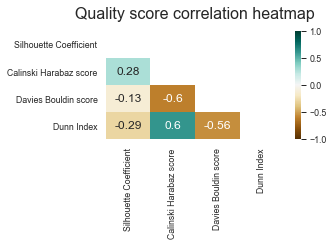

In [367]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

corr_plt_df = norm_df[lst_norm_cols]
plt.figure(figsize=(4,2))
mask = np.triu(np.ones_like(corr_plt_df.corr(), dtype=np.bool))
heatmap = sns.heatmap(corr_plt_df.corr(), mask=mask,vmin=-1, vmax=1,annot=True,cmap='BrBG')
heatmap.set_title('Quality score correlation heatmap',fontdict={'fontsize':16}, pad=12)
plt.show()

### Plot quality measures

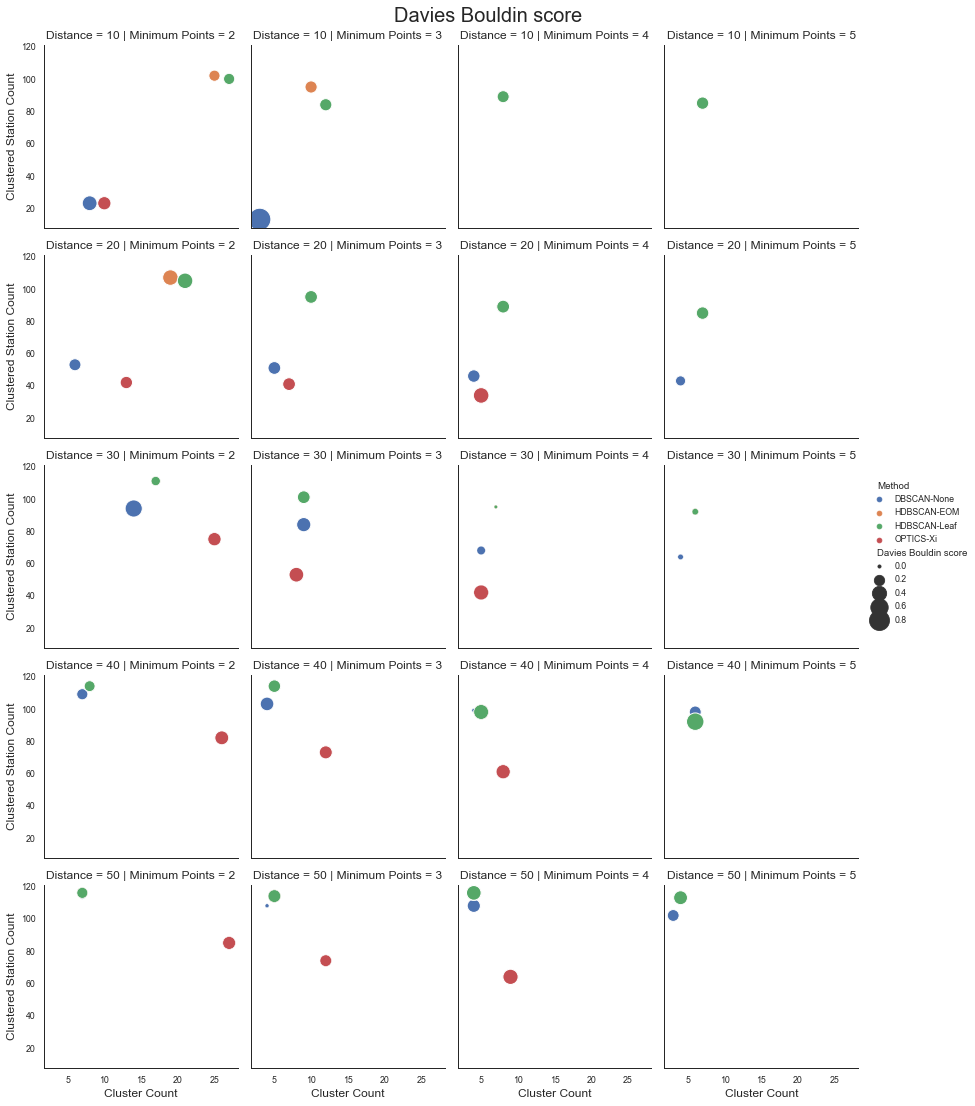

In [368]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#plot_qlty_msr_df=[norm_df['Method','Cluster Count','Clustered Station Count',
#                          'Minimum Points','Distance','Davies Bouldin score']]
#plt.figure(figsize=(5,5))
plt.rcParams['figure.figsize']=(5,5)
#fig, g = plt.subplots(2, 2, figsize=(15,2*5), dpi=100, sharex=True, sharey=True)
sns.set_style("white")
sns.set_context("paper", rc={"font.size":12, "axes.labelsize":12}, font_scale=1.0)
g=sns.relplot(
    data=norm_df,
    row='Distance', col='Minimum Points',
    x="Cluster Count", y="Clustered Station Count",
    hue="Method", size="Davies Bouldin score",
    palette='deep', sizes=(10, 500),
    height=3.0
)

plt.suptitle('Davies Bouldin score',y=1.01, size=20)
#g.fig.legend(markerscale=1.2)
plt.show()

## Graph-clustering

In [372]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

graph_clust_df=pd.read_csv("./Experiment_Data_Graph_Cluster.csv")
#graph_clust_df.head()
lst_drop_cols = ['Trial', 'Station Type', 'Station Quantity', 'Algorithm', 
               'Epsilon', 'Minimum Points', 'Metric', 'Fit_Predict']
graph_clust_df = graph_clust_df.drop(lst_drop_cols,axis=1)
graph_clust_df = graph_clust_df[~graph_clust_df["Modularity"].isin(['None'])]
graph_clust_df = graph_clust_df[~graph_clust_df["Conductance Average"].isin(['None'])]
graph_clust_df = graph_clust_df[~graph_clust_df["Coverage Score"].isin(['None'])]
graph_clust_df = graph_clust_df[~graph_clust_df["Performance Score"].isin(['None'])]

''' append cluster name to method '''
graph_clust_df['Method'] = graph_clust_df['Name']+'-'+graph_clust_df['Method']
graph_clust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Trial                    20 non-null     int64  
 1   Station Type             20 non-null     object 
 2   Station Quantity         20 non-null     int64  
 3   Name                     20 non-null     object 
 4   Algorithm                20 non-null     object 
 5   Distance                 20 non-null     int64  
 6   Epsilon                  20 non-null     float64
 7   Minimum Points           20 non-null     object 
 8   Metric                   20 non-null     object 
 9   Method                   20 non-null     object 
 10  Fit_Predict              20 non-null     object 
 11  Cluster Count            20 non-null     int64  
 12  Clustered Station Count  20 non-null     int64  
 13  Unclustered Noise Count  20 non-null     int64  
 14  Modularity               20 

## Normalize quality measures

In [375]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#scaler = StandardScaler()
scaler = MinMaxScaler()

norm_df = graph_clust_df.copy()
lst_norm_cols = list(['Modularity',
                      'Conductance Average',
                      'Coverage Score',
                      'Performance Score'])
for col in lst_norm_cols:
    scaled = scaler.fit_transform(np.array(graph_clust_df[col]).reshape(-1,1))
    norm_df[col] = pd.DataFrame(scaled)
norm_df = norm_df.dropna()
print('Normalization complete!')

Normalization complete!


## Correlation Matrix

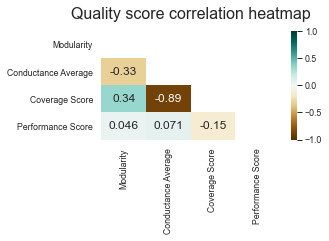

In [376]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

corr_plt_df = norm_df[lst_norm_cols]
plt.figure(figsize=(4,2))
mask = np.triu(np.ones_like(corr_plt_df.corr(), dtype=np.bool))
heatmap = sns.heatmap(corr_plt_df.corr(), mask=mask,vmin=-1, vmax=1,annot=True,cmap='BrBG')
heatmap.set_title('Quality score correlation heatmap',fontdict={'fontsize':16}, pad=12)
plt.show()

## Plot quality measures

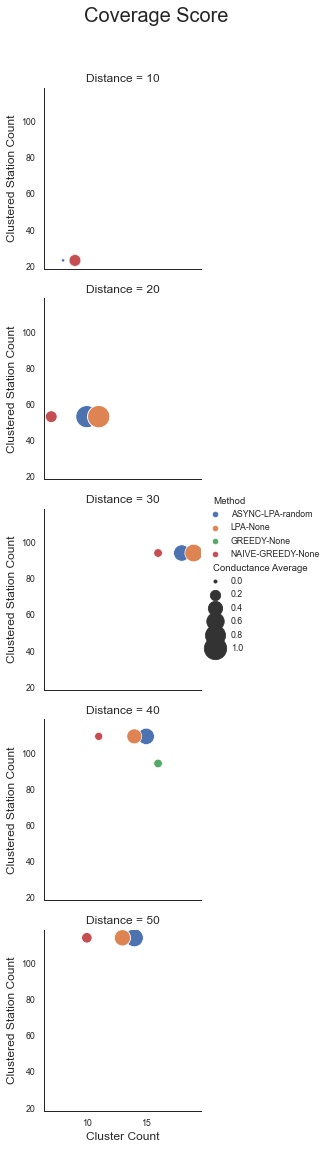

In [382]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#plot_qlty_msr_df=[norm_df['Method','Cluster Count','Clustered Station Count',
#                          'Minimum Points','Distance','Davies Bouldin score']]
#plt.figure(figsize=(5,5))
plt.rcParams['figure.figsize']=(5,5)
#fig, g = plt.subplots(2, 2, figsize=(15,2*5), dpi=100, sharex=True, sharey=True)
sns.set_style("white")
sns.set_context("paper", rc={"font.size":12, "axes.labelsize":12}, font_scale=1.0)
g=sns.relplot(
    data=norm_df,
    row='Distance', 
    #col='Minimum Points',
    x="Cluster Count", y="Clustered Station Count",
    hue="Method", size="Conductance Average",
    palette='deep', sizes=(10, 500),
    height=3.0
)

plt.suptitle('Coverage Score',y=1.05, size=20)
#g.fig.legend(markerscale=1.2)
plt.show()

## Redundant Code

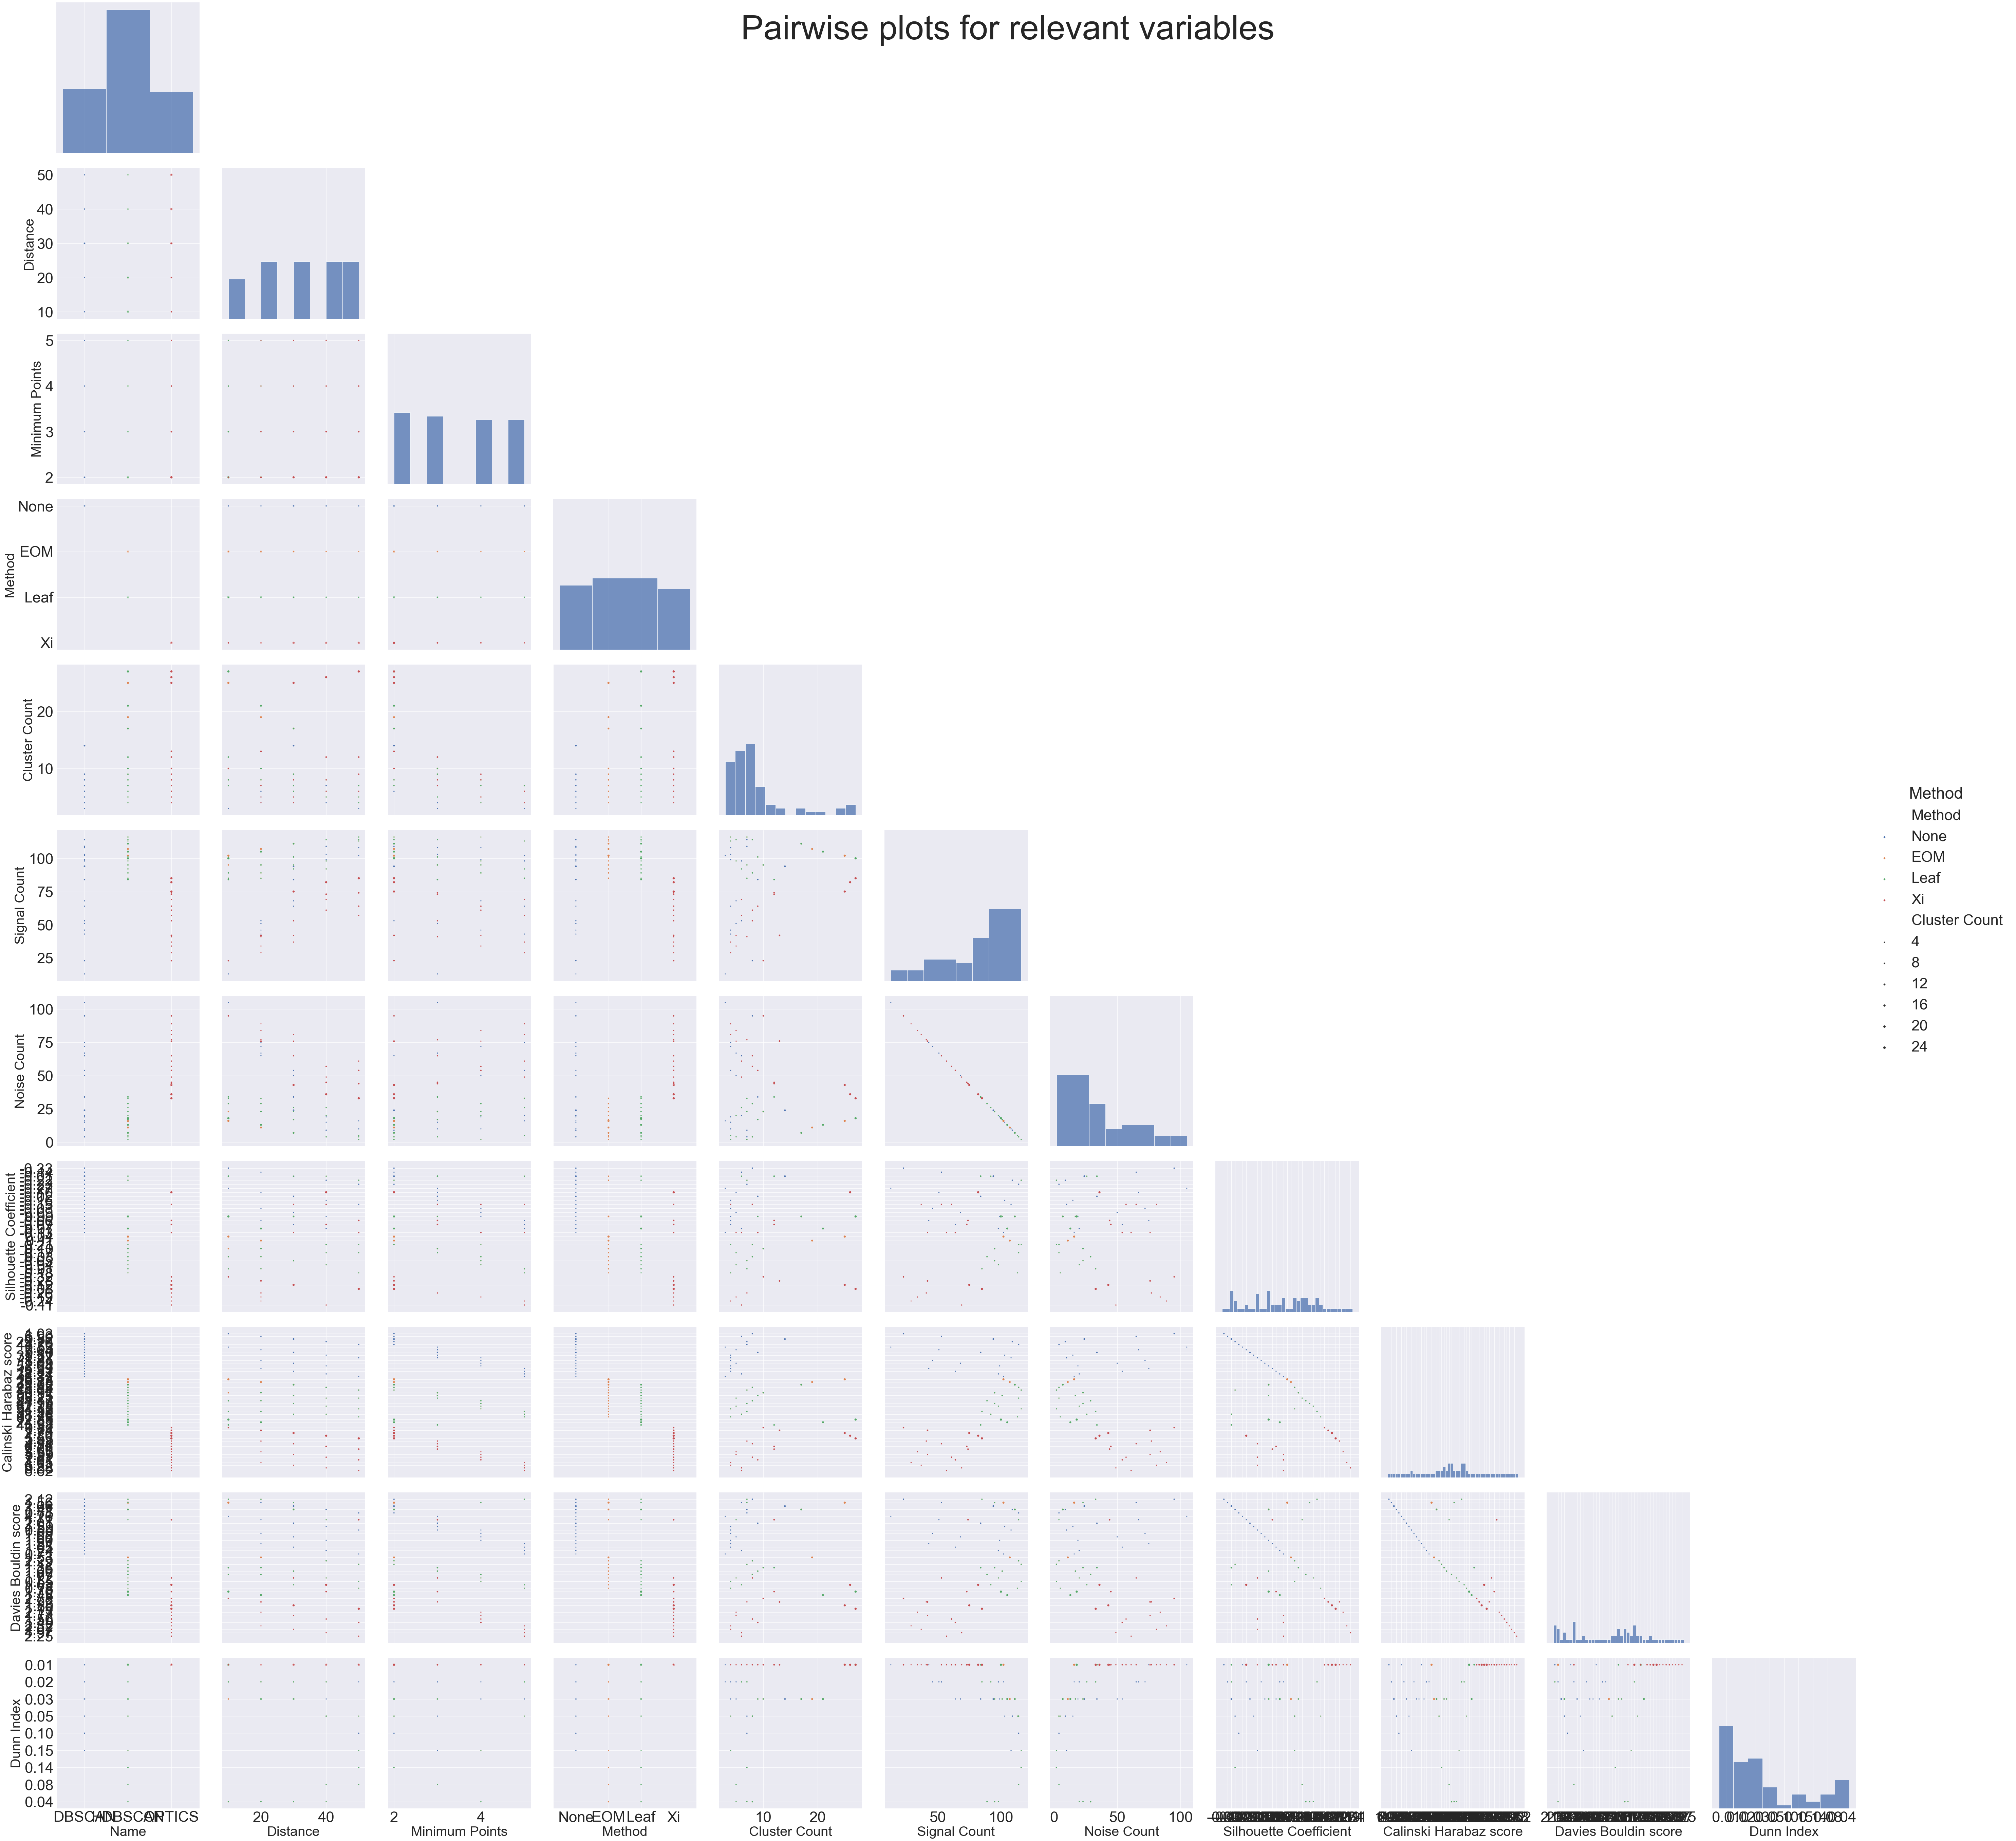

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pg_plot_df = cloud_clust_df.copy()
lst_vars = list(pg_plot_df.columns)
#lst_vars = list([''])
#x_vars=[cloud_clust_df['Distance'],cloud_clust_df['Minimum Points'],
#        cloud_clust_df['Cluster Count'],cloud_clust_df['Signal Count'],
#        cloud_clust_df['Noise Count']]
#y_vars=[cloud_clust_df['Silhouette Coefficient'],cloud_clust_df['Calinski Harabaz score'],
#        cloud_clust_df['Davies Bouldin score'],cloud_clust_df['Dunn Index']]
sns.color_palette("husl", 4)
sns.set_context("paper", rc={"font.size":8, "axes.labelsize":40}, font_scale=5)
''' kind = hist, scatter, '''
#g = sns.PairGrid(cloud_clust_df, hue='Method_Code', corner=True,hue_order=None,
#                 kind='scatter', diag_kind='hist', height=7,markers='o',
#                 plot_kws={"s": 200}, color=".3")
g = sns.PairGrid(pg_plot_df, hue="Method", vars=lst_vars, corner=True, height=7)
g.map_diag(sns.histplot, hue=None)
#g.map_upper(sns.scatterplot)
#g.map_lower(sns.kdeplot)
g.map_offdiag(sns.scatterplot,s=200, size=pg_plot_df["Cluster Count"])
g.fig.suptitle("Pairwise plots for relevant variables", size=100) # y= some height > 1
g.add_legend()
#g.fig.legend(markerscale=2)
plt.show()